## Dataset Description 
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
___
    
## Columns Description
1. `PatientId`: Identification of a patient.
2. `AppointmentID`: Identification of each appointment.
3. `Gender`: Male or Female.
4. `AppointmentDay`: The day of the actuall appointment, when they have to visit the doctor.
5. `ScheduledDay`: The day someone called or registered the appointment, this is before appointment of course.
6. `Age`: How old is the patient.
7. `Neighbourhood`: Where the appointment takes place.
8. `Scholarship`: True of False, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
9. `Hipertension`: True or False.
10. `Diabetes`: True or False.
11. `Alcoholism`: True or False.
12. `Handcap`: True or False.
13. `SMS_received`: 1 or more messages sent to the patient.
14. `No-show`: True (if the patient did not show up), or False (if the patient did show up).
___
    
## EDA Questions
Q1: How often do men go to hospitals compared to women? Which of them is more likely to show up?  
Q2: Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?  
Q3: Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?  
Q4: Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?
____

## Environment set-up

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

___
## Data Wrangling 
We'd load our desired data from the flat csv file `noshowappointments-kagglev2-may-2016.csv` to a dataframe using `pandas`, and display its first 5 records. here, we want to check for:
- Missingness in our dataframe.
- Inconsistent data types.
- NaNs.
- Duplicated rows.
- columns to be droped or re-parsed.

In [2]:
#Load Data
df = pd.read_csv(r'D:\Projects\My portofolio - Completed projects\Python\2024 10 Medical Appointment Dataset Analysis\noshowappointments-kagglev2-may-2016.csv')

#cheack top rows
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# display the number of rows and columns in the dataset

df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**We can notice there are no NaNs at all in our data:**
- `ScheduledDay` and `AppointmentDay` needs to be casted to date data type.
- we may append a new column for days until appointment.
- `Gender` needs to be converted into a categoy type
- `Scholarship` `Hipertension` `Diabetes` `Alcoholism` `Handcap` better be boolean data type.
- `No-show` needs to be parsed and casted to boolean too.

In [5]:
# checking for duplicates
df.duplicated().sum()

0

**our dataset has no duplicated rows either.**

In [6]:
# exploring the unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# exploring handcap values
df.Handcap.value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [8]:
# exploring Age values
df.Age.value_counts()

Age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: count, Length: 104, dtype: int64

In [9]:
# exploring age column distribution
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- `Handcap` column has inconsistant unique values, we'd be only intrested in rows with `0` or `1` values.
- `Age` column has inconsistant unique values, we'd be handle it.
- `SMS_received` would be casted to boolean data type.

## Exploration Summery
1. our dataset consists of 110527 rows with 14 columns, and has no NaNs nor duplicated values.
2. `PatientId` and `AppointmentId` columns wouldn't be helpful during analysis.
3. `ScheduledDay` and `AppointmentDay` needs to be casted to date data type.
4. we may append a new column for days until appointment.
5. `Gender` needs to be casted into a categoy type
6. `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism` and `SMS_recieved` better be boolean data type.
7. `No-show` column needs to be parsed and asted to boolean type.
8. `Handcap` colume needs to be cleaned to have only `0` and `1` values.
9. `Age` columns has inconsistant unique values that needs to be handled.
___

## Data Cleaning
**in this section, we'd perform some operations on our dataset based on the previous findings to make our analysis more accurate and clear.**

**Dropping `PatientId` and `AppointmentId` columns**

In [10]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

**Handling `date` data type**

In [11]:
df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

it looks like all hours are set to 00:00:00, so we would want to extract the year, month and day data

In [12]:
# extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].astype(str).str[:10]
df['AppointmentDay'] = df['AppointmentDay'].astype(str).str[:10]

# changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# ceck changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)


AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


In [13]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now, we'd move into appending a new column that holds number of days to the appointment.

In [14]:
# making new due days column
df['DueDays'] = df['AppointmentDay'] - df['ScheduledDay']

# converting data type 
df['DueDays'] = df['DueDays'].dt.days


In [15]:
df.DueDays

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: DueDays, Length: 110527, dtype: int64

In [16]:
# viewing summery statistics
df['DueDays'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DueDays, dtype: float64

We seem to have some negative values here, we'll drop them.

In [17]:
df[df['DueDays'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDays
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [18]:
# dropping negative values
df.drop(df[df['DueDays'] < 0].index, inplace = True)
df['DueDays'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DueDays, dtype: float64

**Converting `Gender` to categorical variables**

In [19]:
# converting gender column
df['Gender'] = df['Gender'].astype('category')

df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

**Parsing and casting `No-show` column**

In [20]:
# mapping alues to be more familiar
df.loc[df['No-show'] == 'Yes', 'No-show'] = 0
df.loc[df['No-show'] == 'No', 'No-show'] = 1

# casting dt type and confirming changes
df['No-show'] = df['No-show'].astype(bool)
df['No-show'].dtypes

dtype('bool')

**Converting `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap` and `SMS_received` to boolean data type**

In [21]:
# converting columns to bool
columns = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[columns] = df[columns].astype(bool)
df[columns].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

**Cleaning `Handcap` column**

In [22]:
# check rows with values of handcap > 1
df[df['Handcap'] > 1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDays
946,M,2016-04-14,2016-04-29,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,2016-03-30,2016-04-29,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,2016-03-30,2016-04-29,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,2016-04-29,2016-04-29,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,2016-04-29,2016-04-29,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,F,2016-06-01,2016-06-07,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,2016-05-31,2016-06-02,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,2016-06-03,2016-06-07,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,2016-06-02,2016-06-06,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


We have 199 rows with inconsistant values, we'd replace them with 1 to treat them as beeing handcaped.

In [23]:
# filling the bigger values with 1
df.loc[df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type
df['Handcap'] = df['Handcap'].astype(bool)

In [24]:
df['Handcap'].unique()

array([False,  True])

**Cleaning `Age` column**

In [25]:
#checking negative values
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDays
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,True,0


We have one value with negative age, so we will drop it.

In [26]:
# dropping row with negative age
df.drop(df[df['Age'] < 0].index, inplace = True)

#checking negative values
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDays


**Checking data again**

In [27]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDays
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110521 non-null  category      
 1   ScheduledDay    110521 non-null  datetime64[ns]
 2   AppointmentDay  110521 non-null  datetime64[ns]
 3   Age             110521 non-null  int64         
 4   Neighbourhood   110521 non-null  object        
 5   Scholarship     110521 non-null  bool          
 6   Hipertension    110521 non-null  bool          
 7   Diabetes        110521 non-null  bool          
 8   Alcoholism      110521 non-null  bool          
 9   Handcap         110521 non-null  bool          
 10  SMS_received    110521 non-null  bool          
 11  No-show         110521 non-null  bool          
 12  DueDays         110521 non-null  int64         
dtypes: bool(7), category(1), datetime64[ns](2), int64(2), object(1)
memory usage: 5.9+ MB


**We endded up with a datafram of 110521 rows and 13 columns, and everything looks tidy and clean. We'd proceed in visualizing it to extract meaningful insights from it.**
____

## Data Visualization and EDA
Now that our data is clean, we'd perform some EDA on it in order to extract useful insights from it.

In [29]:
# setting seaborn configurations
sns.set_style("dark")
palette_options = ['bright']

**1. How often do men go to hospitals compared to women? Which of them is more likely to show up?**

In [30]:
df['Gender'].value_counts()

Gender
F    71836
M    38685
Name: count, dtype: int64

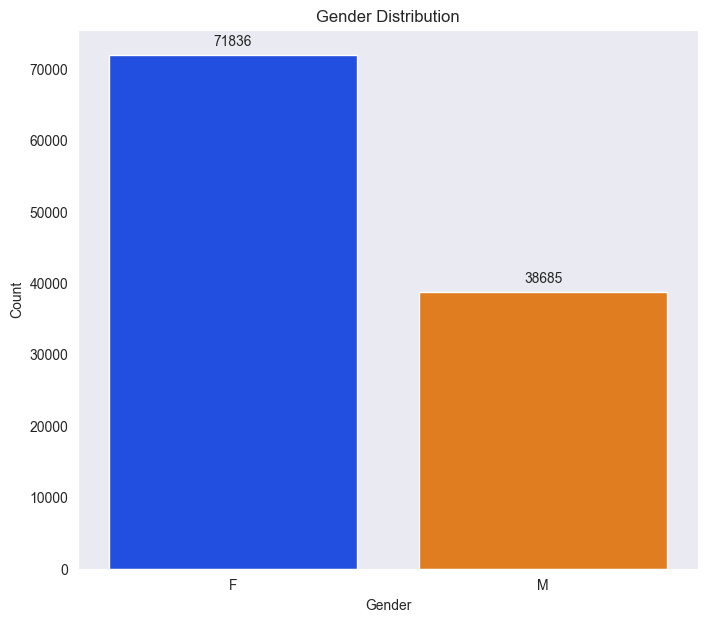

In [31]:
# Display the distribution of the gender column
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='Gender', hue='Gender', data=df, palette='bright', legend=False) 
plt.title("Gender Distribution")
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')    

# Adding numerical labels on each bar and formatting
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

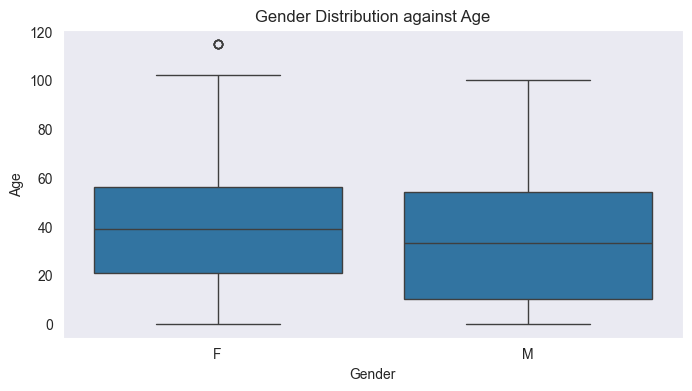

In [32]:
# Display gender distribution against age in our dataset
plt.figure(figsize=(8, 4))
ax = sns.boxplot(x='Gender', y='Age', data=df)
plt.title("Gender Distribution against Age") 

plt.show()

- we can notice that nearly half of our dataset conists of women with wider age destribution and some outliers, all of which achieving a rate higher than men.

In [33]:
no_show_counts = df['No-show'].value_counts()
no_show_percentages = df['No-show'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame
no_show_summary = pd.DataFrame({
    'Count': no_show_counts,
    'Percentage': no_show_percentages
})

no_show_summary

,Count,Percentage
No-show,,
True,88207,79.810172
False,22314,20.189828


- it is obvious that 79.8% of our patients did show up on their appointments and only 20.1% of them did not.  

let's dive deeper to see if this is related to gender.

In [34]:
gender_no_show_table = pd.crosstab(df['Gender'], df['No-show'])

# Rename columns
gender_no_show_table.columns = ['Show', 'No-show']

gender_no_show_table

,Show,No-show
Gender,,
F,14591,57245
M,7723,30962


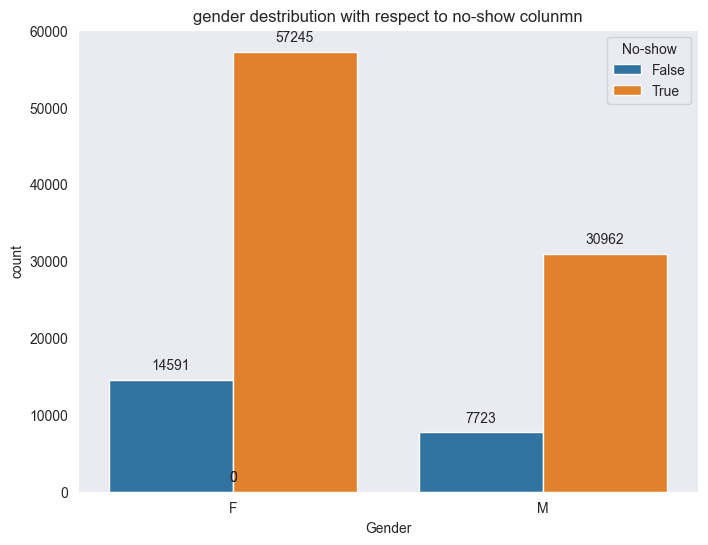

In [35]:
# Display gender destribution with respect to the no-show colunmn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'Gender', data = df, hue = 'No-show')
plt.title('gender destribution with respect to no-show colunmn')

# Adding numerical labels on each bar and formatting
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

- from the above chart, we can come up with a conclusion that women do show up on their appointments more often than men do, but this may be affected by the percentage of women on this dataset.
____

**2. Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?**

In [36]:
# recieving SMS distribution
SMS_received_counts = df['SMS_received'].value_counts()
SMS_received_percentages = df['SMS_received'].value_counts(normalize=True)* 100

# Combine counts and percentages into a DataFrame
SMS_received_summary = pd.DataFrame({
    'Count': SMS_received_counts,
    'Percentage': SMS_received_percentages
})

SMS_received_summary

,Count,Percentage
SMS_received,,
False,75039,67.895694
True,35482,32.104306


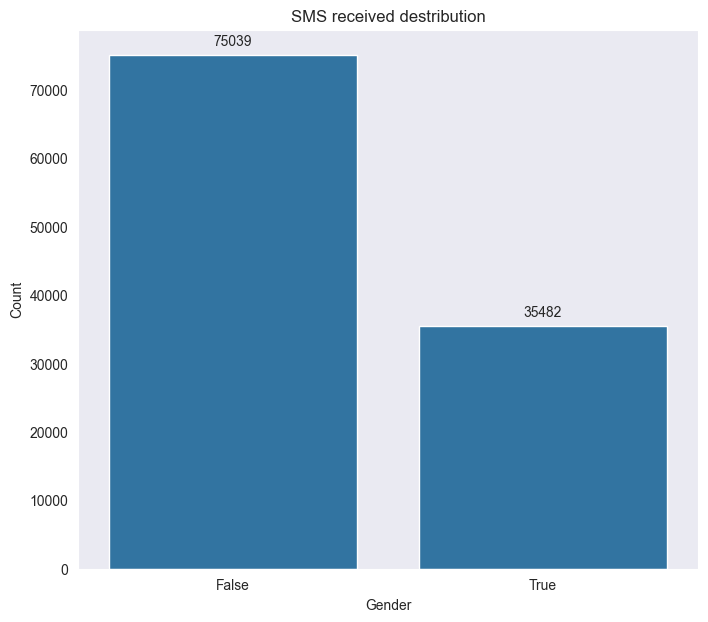

In [37]:
# Display recieving SMS distribution
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='SMS_received', data=df)
plt.title("SMS received destribution")
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')    

# Adding numerical labels on each bar and formatting
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

- we can see that 67.8% of our patients did not recive any SMS reminder of their appointments, is this may be affecting their showin up?

In [38]:
SMS_received_no_show_table = pd.crosstab(df['SMS_received'], df['No-show'])
SMS_received_no_show_table.columns = ['SMS_received', 'No-show']

SMS_received_no_show_table

,SMS_received,No-show
SMS_received,,
False,12530,62509
True,9784,25698


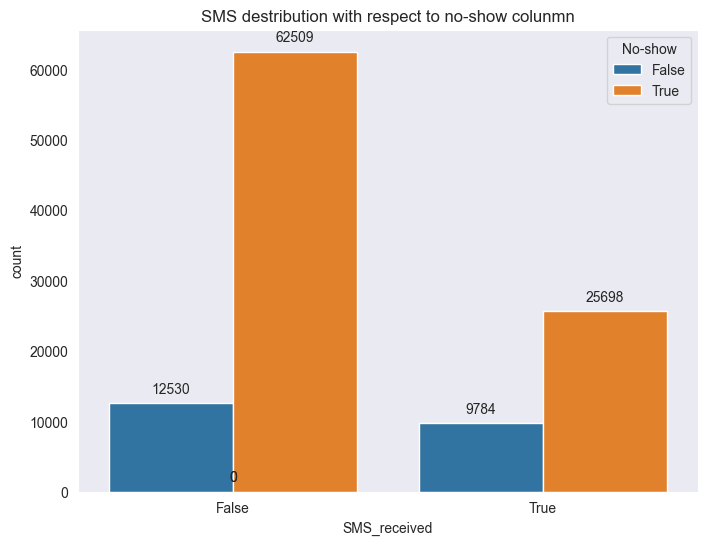

In [39]:
# Display gender destribution with respect to the no-show colunmn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'SMS_received', data = df, hue = 'No-show')
plt.title('SMS destribution with respect to no-show colunmn')

# Adding numerical labels on each bar and formatting
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

- we can see that our previous deduction was not quiet correct, as the vast majority of our patients did not recieve any SMS reminder and yet they showed up on their appointments.

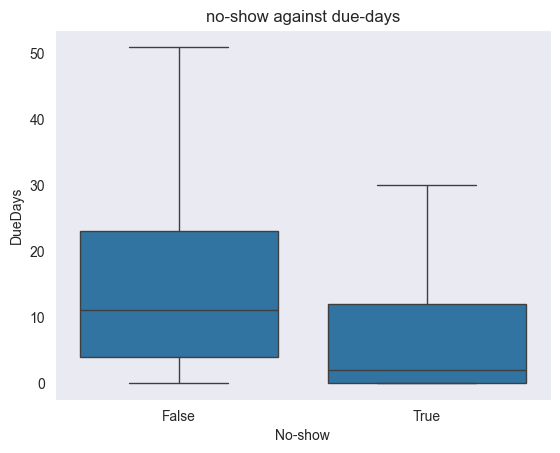

In [40]:
# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'No-show', y = 'DueDays', data = df, showfliers = False)
plt.title('no-show against due-days')
plt.show()

- it is clear that there is a correlation between number of due days and whether a patient shows up or not.
- patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up. 

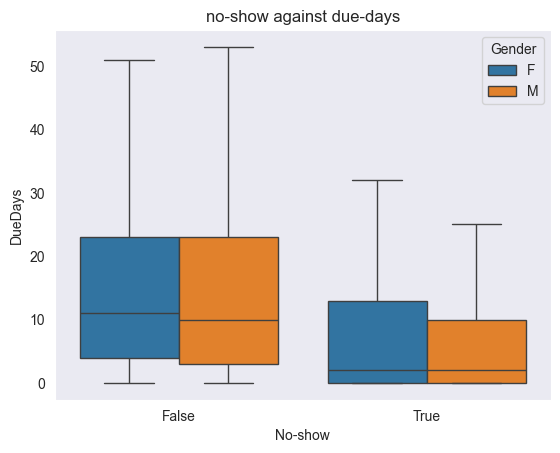

In [41]:
# viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x = 'No-show', y = 'DueDays', data = df, hue = 'Gender', showfliers = False)
plt.title('no-show against due-days')
plt.show()

- gender does not affect number of due days and showing up at an appointment that much.
____

**3. Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?**

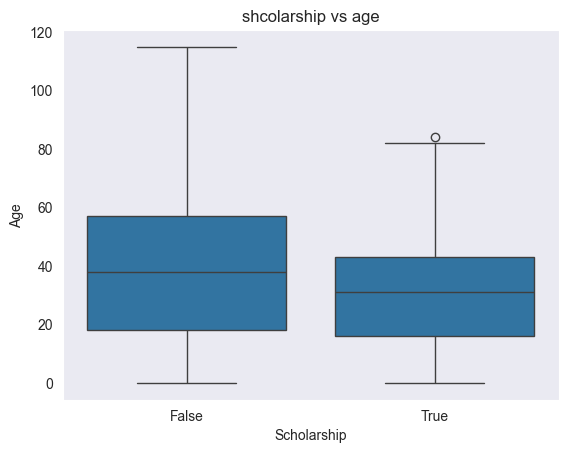

In [42]:
# Display scholarship against age
sns.boxplot(x = 'Scholarship', y = 'Age', data = df)
plt.title('shcolarship vs age')
plt.show()


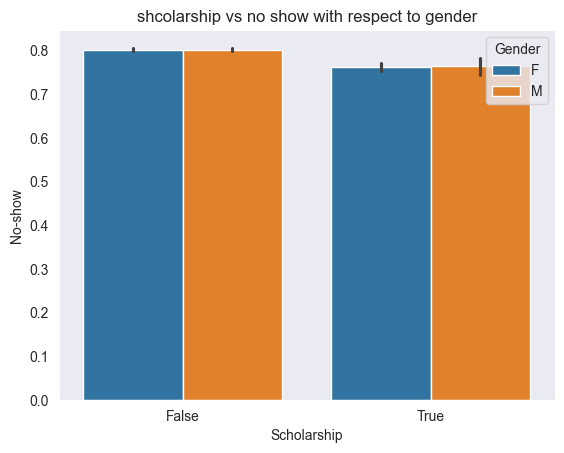

In [43]:
# plotting having a scholarship against no show with respect to gender
ax = sns.barplot(x = 'Scholarship', y = 'No-show', hue = 'Gender', data = df)
plt.title('shcolarship vs no show with respect to gender')

plt.show()

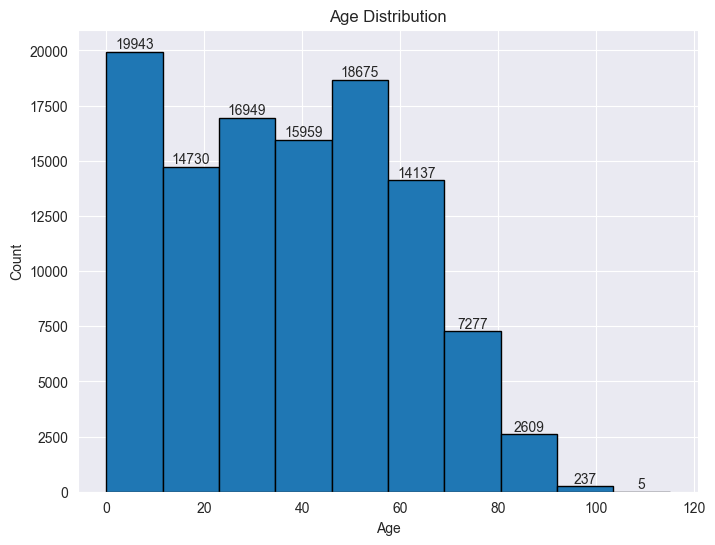

In [44]:
# ploting age destribution
ax = df['Age'].hist(bins=10, edgecolor='black', figsize=(8, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')


for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2, 
             p.get_height(), 
             f'{int(p.get_height())}', 
             ha='center', 
             va='bottom',)

plt.show()

- we can see that having a scolarship doesn't affect showing up to a doctor appointment that much and that huge age group is enrolled to that scholarship and also enrol their babies on.
____

**4. Does having certain deseas affects whather or not a patient may show up to their appointment? is it affected by gender?**

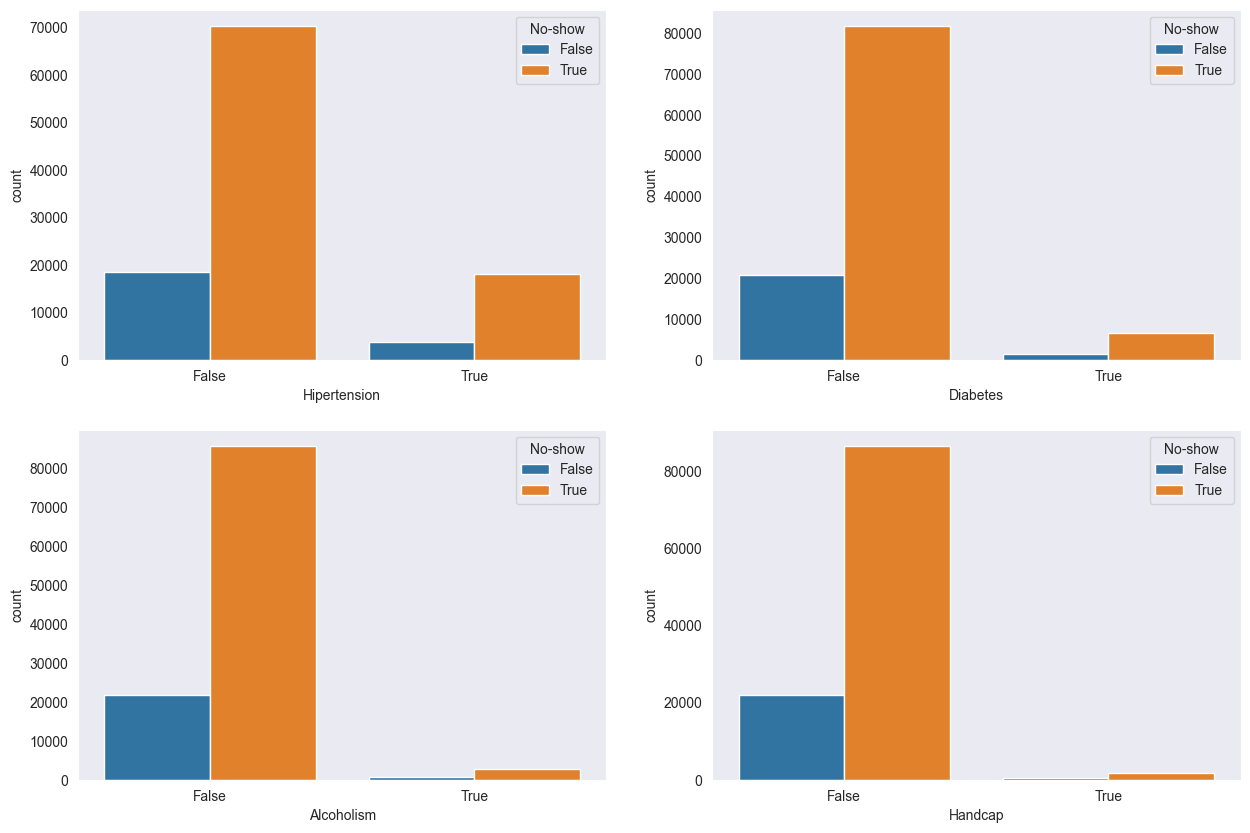

In [45]:
# plotting deseases against no show

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = df, hue= 'No-show')
plt.show()

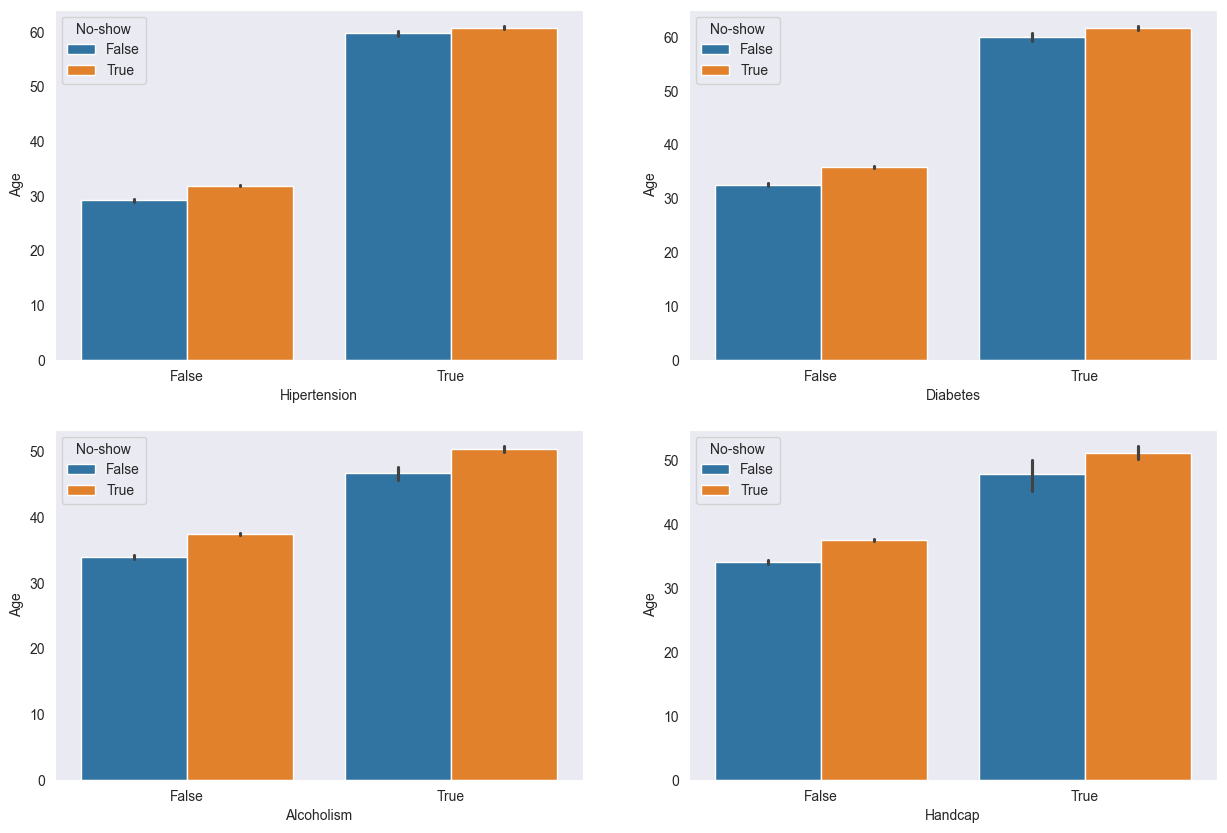

In [46]:
# plotting deseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = df, hue= 'No-show')
plt.show()

- from the previous set of plots, we can conclude that the vast majority of our dataset does not have chronic deseases, yet, they are existed in so many young people.  
- having a chronic deseas may affect your showing up at a hospital's appointment.

___
## Conclusion

### Q1: How often do men go to hospitals compared to women? Which of them is more likely to show up?
- Nearly half of our dataset conists of women with wider age destribution and some outliers, all of which achiees a rate higher than men.

- It is obvious that 79.8% of our patients did show up on their appointments and only 20.1% of them did not.

- Women do show up on their appointments more often than men do, but this may b affected by the percentage of women on this dataset.
___
### Q2: Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?
- 67.8% of our patients did not reciee any SMS reminder of their appointments, yet they showed up on their appointments.
- It is clear that there is a positive correlation between number of due days and whether a patient shows up or not.
- Patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up.
- gender does not affect number of due days and showing up at an appointment that much.
___
### Q3: Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?
- Having a scholarship does not affect showing up to a doctor appointment that much.
- Huge age group is enrolled to that scholarship and also enrol their babies on.
___
### Q4: Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?
- We can conclude that the vast majority of our dataset does not have chronic deseases, yet, they are existed in so many young people.
- Having a chronic deseas may affect your showing up at a hospital's appointment.


> **"This project was entirely developed by **Bassam El-Shoraa**"**.